# <font color="darkblue"> Prática 01: Regressão Linear - Renda Média Brasileira </font>

**Objetivos:**


*   Implementar o algoritmo de Regressão Linear
*   Fixar o conceito de regressão sobre dados e seus uso para previsão

**Requisitos de execução:**


*   Upload do arquivo *read_series.py*
*   Criar o diretório *data* e upload do arquivo *renda_Brasil_2012_2020.csv* neste diretório

**Atividade 1:**

Leia a série temporal das rendas médias das famílias brasileiras contidas no arquivo *renda_Brasil_2012_2020.csv* e plote seus valores em um gráfico de dispersão.









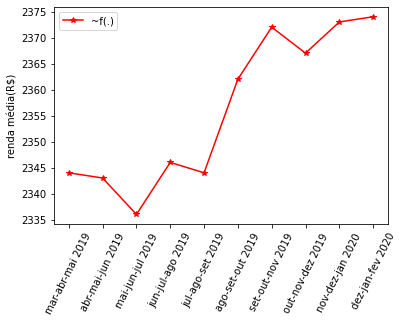

In [4]:
from read_series import ReadSeries
from matplotlib import pyplot as plt
import numpy as np

def config_plt():
    fig, ax = plt.subplots()
    #rotacionar os label do eixo x (datas)
    for label in ax.get_xticklabels():
        label.set_rotation(90*(-180/np.pi)+180)
        
    plt.ylabel('renda média(R$)')

        
data = []
time = []
rs = ReadSeries()
rs.read_income_csv(data, time)

_data = data[86:96]
_timeLabel = time[86:96]
_time = [i for i in range(len(_timeLabel))]

_timePstring = time[96:]
_timePredict = [i for i in range(len(_timeLabel) , len(_timeLabel)+len(_timePstring))]


config_plt()

plt.plot(_timeLabel, _data, 'r-*')
plt.legend(['~f(.)'], loc=2)

**Atividade 2:**

Implemente o algoritmo de Regressão Linear que retorne o vetor de pesos $w=(X^TX)^{-1}X^Ty$

In [28]:
class LinearRegression_:
    
    def __init__(self):
        self.w = None
        
    
    def fit(self, _X, _y):
        #Recebe um vetor de features e um vetor de labels
        #Aplica o método da pseudo-inversa para encontrar os pesos:  𝐗† = (XTX)−1 XT;
        print("\b\b𝐗†\b\b")
        
        _X = np.array(_X)
        _y = np.array(_y)
        
        #Adiciona uma coluna de 1s para o bias
        #X_ = np.c_[np.ones((_X.shape[0], 1)), _X]
        #Calcula a pseudo-inversa
        X_pinv = (np.linalg.inv(_X.T.dot(_X)).dot(_X.T))
        self.w = X_pinv.dot(_y)
     
    def predict(self, _x):
        #Recebe um vetor de features, e usa os coeficientes encontrados no método fit para fazer a predição 
        _x = np.array(_x)       
        
        return _x.dot(self.w)
    
    def getW(self):
        return self.w

**Atividade 3:** 

1. Utilize o algoritmo de Regressão Linear para computar a função hipotese $h(x)=w^Tx$ e plote a mesma no gráfico de dispersão;
2. Faça a previsão de 3 novos meses futuros e exiba esta previsão no gráfico.

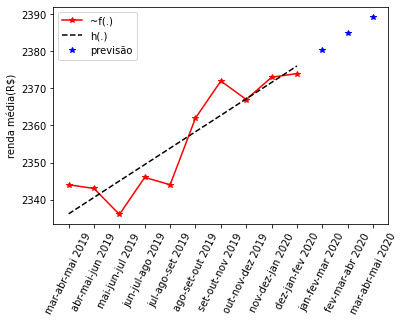

In [30]:
_timeRL = [[1, t] for t in _time]

lr = LinearRegression_()
lr.fit(_timeRL, _data)

_dataRL = lr.predict(_timeRL)

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict([[1, t] for t in _timeForecast])




config_plt()
    
plt.plot(_timeLabel, _data, 'r-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)

**Atividade 4:**

Reproduza o mesmo experimento utilizando a classe *LinearRegression* do pacote *sklearn*

*from sklearn.linear_model import LinearRegression*


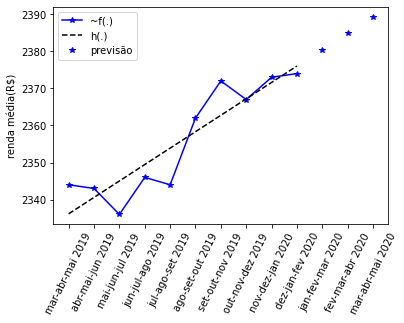

In [34]:
from sklearn.linear_model import LinearRegression

# Criação e treinamento do modelo

lr = LinearRegression() # Cria o objeto de regressão linear
lr.fit(np.array(_timeRL), np.array(_data)) # Treina o modelo

_dataRL = lr.predict(_timeRL)

_timeLabelForecast = time[96:]
_timeForecast = [i for i in range(len(_timeLabel), len(_timeLabel) + len(_timeLabelForecast))]
_dataForecast = lr.predict([[1, t] for t in _timeForecast])




config_plt()
    
plt.plot(_timeLabel, _data, 'b-*')
plt.plot(_timeLabel, _dataRL, 'k--')
plt.plot(_timeLabelForecast, _dataForecast, 'b*')

plt.legend(['~f(.)', 'h(.)', 'previsão'], loc=2)



In [37]:
# Comparação entre os modelos

def MSE(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.sum((y-y_pred)**2)/len(y)

def R2(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return 1 - (np.sum((y-y_pred)**2)/np.sum((y-y.mean())**2))



print("MSE do modelo implementado: ", MSE(_data, _dataRL))
print("R2 do modelo implementado: ", R2(_data, _dataRL))
print("_"*50)
print("MSE do modelo do sklearn: ", MSE(_data, lr.predict(_timeRL)))
print("R2 do modelo do sklearn: ", R2(_data, lr.predict(_timeRL)))




MSE do modelo implementado:  36.36242424242444
R2 do modelo implementado:  0.8166199796135738
__________________________________________________
MSE do modelo do sklearn:  36.36242424242444
R2 do modelo do sklearn:  0.8166199796135738
